In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


In [49]:
# Load the dataset
df = pd.read_csv('../../data/Gold Price (2013-2023).csv')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%
...,...,...,...,...,...,...,...
2578,01/08/2013,"1,663.20","1,651.50","1,662.60","1,648.80",0.13K,0.97%
2579,01/07/2013,"1,647.20","1,657.30","1,663.80","1,645.30",0.09K,-0.16%
2580,01/04/2013,"1,649.90","1,664.40","1,664.40","1,630.00",0.31K,-1.53%
2581,01/03/2013,"1,675.60","1,688.00","1,689.30","1,664.30",0.19K,-0.85%


In [50]:
df.dtypes

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [51]:
df = pd.DataFrame(df)

In [55]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-12-30,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,2022-12-29,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,2022-12-28,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,2022-12-27,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,2022-12-26,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%
...,...,...,...,...,...,...,...
2578,2013-01-08,"1,663.20","1,651.50","1,662.60","1,648.80",0.13K,0.97%
2579,2013-01-07,"1,647.20","1,657.30","1,663.80","1,645.30",0.09K,-0.16%
2580,2013-01-04,"1,649.90","1,664.40","1,664.40","1,630.00",0.31K,-1.53%
2581,2013-01-03,"1,675.60","1,688.00","1,689.30","1,664.30",0.19K,-0.85%


In [56]:
# # Convert to numeric
# for col in ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']:
#     if col == 'Vol.':
#         df[col] = df[col].str.replace('K', '').astype(float) * 1000  # Remove 'K' and multiply by 1000
#     elif col == 'Change %':
#         df[col] = df[col].str.replace('%', '').astype(float) / 100  # Remove percentage signs and convert to float
#     else:
#         df[col] = df[col].astype(float)  # Convert to float
# 
# print(df)


# Convert to numeric
for col in ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']:
    df[col] = df[col].str.replace(',', '')  # Remove commas
    df[col] = df[col].astype(str)  # Ensure all columns are string
    if col == 'Vol.':
        df[col] = df[col].str.replace('K', '').astype(float) * 1000  # Remove 'K' and multiply by 1000
    elif col == 'Change %':
        df[col] = df[col].str.replace('%', '').astype(float) / 100  # Remove percentage signs and convert to float
    else:
        df[col] = df[col].astype(float)  # Convert to float

print(df)

           Date   Price    Open     High      Low      Vol.  Change %
0    2022-12-30  1826.2  1821.8  1832.40  1819.80  107500.0    0.0001
1    2022-12-29  1826.0  1812.3  1827.30  1811.20  105990.0    0.0056
2    2022-12-28  1815.8  1822.4  1822.80  1804.20  118080.0   -0.0040
3    2022-12-27  1823.1  1808.2  1841.90  1808.00  159620.0    0.0074
4    2022-12-26  1809.7  1805.8  1811.95  1805.55       NaN    0.0030
...         ...     ...     ...      ...      ...       ...       ...
2578 2013-01-08  1663.2  1651.5  1662.60  1648.80     130.0    0.0097
2579 2013-01-07  1647.2  1657.3  1663.80  1645.30      90.0   -0.0016
2580 2013-01-04  1649.9  1664.4  1664.40  1630.00     310.0   -0.0153
2581 2013-01-03  1675.6  1688.0  1689.30  1664.30     190.0   -0.0085
2582 2013-01-02  1689.9  1675.8  1695.00  1672.10      60.0    0.0078

[2583 rows x 7 columns]


In [57]:

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0      2022-12-30
1      2022-12-29
2      2022-12-28
3      2022-12-27
4      2022-12-26
          ...    
2578   2013-01-08
2579   2013-01-07
2580   2013-01-04
2581   2013-01-03
2582   2013-01-02
Name: Date, Length: 2583, dtype: datetime64[ns]

In [88]:

# Create a target variable for price movement (1 for up, 0 for down)
df['Price_Change'] = df['Price'].diff() 
df['Price_Change']

0        NaN
1       -0.2
2      -10.2
3        7.3
4      -13.4
        ... 
2578     6.7
2579   -16.0
2580     2.7
2581    25.7
2582    14.3
Name: Price_Change, Length: 2583, dtype: float64

In [89]:

df['Price_Change']=df['Price_Change'].fillna(0)
df['Price_Change']


0        0.0
1       -0.2
2      -10.2
3        7.3
4      -13.4
        ... 
2578     6.7
2579   -16.0
2580     2.7
2581    25.7
2582    14.3
Name: Price_Change, Length: 2583, dtype: float64

In [90]:

df['Target'] = (df['Price_Change'] > 0).astype(int)
df['Target']

0       0
1       0
2       0
3       1
4       0
       ..
2578    1
2579    0
2580    1
2581    1
2582    1
Name: Target, Length: 2583, dtype: int32

In [91]:

# Use features like 'Price' and lagged 'Price_Change' for classification
df['Price_Change_Lag'] = df['Price_Change'].shift(1).fillna(0)
X = df[['Price', 'Price_Change_Lag']]
X

,Price,Price_Change_Lag
0,1826.2,0.0
1,1826.0,0.0
2,1815.8,-0.2
3,1823.1,-10.2
4,1809.7,7.3
...,...,...
2578,1663.2,-22.5
2579,1647.2,6.7
2580,1649.9,-16.0
2581,1675.6,2.7


In [95]:

y = df['Target']
y

0       0
1       0
2       0
3       1
4       0
       ..
2578    1
2579    0
2580    1
2581    1
2582    1
Name: Target, Length: 2583, dtype: int32

In [61]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.51      0.64      0.57       269
           1       0.47      0.35      0.40       248

    accuracy                           0.50       517
   macro avg       0.49      0.49      0.48       517
weighted avg       0.49      0.50      0.49       517


In [97]:

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.4990328820116054


In [73]:
# Add predictions to the dataframe for visualization
# df_test = df.iloc[y_test.index]
# df_test

# Create a copy of the test set indices
df_test = df.loc[y_test.index].copy()

In [74]:
# df_test['Predicted'] = y_pred

# Add predictions to the dataframe for visualization
df_test.loc[:, 'Predicted'] = y_pred

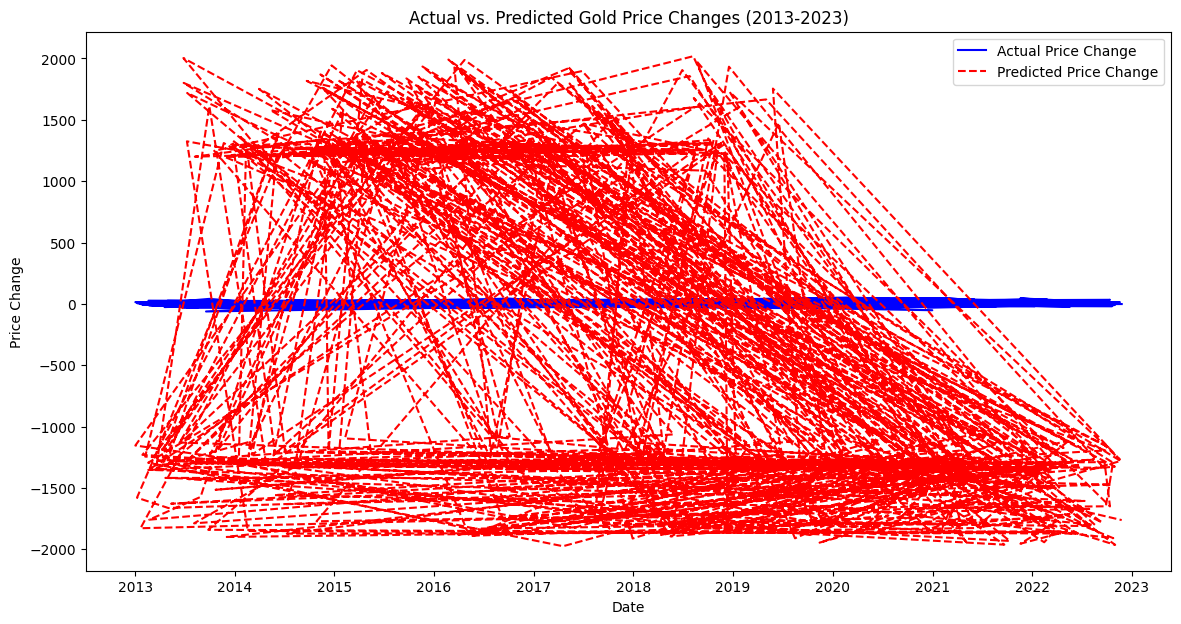

In [85]:

# Visualize the actual vs. predicted price movements
plt.figure(figsize=(14, 7))

# Plot actual price changes
plt.plot(
    df_test['Date'],
    df_test['Price_Change'],
    label='Actual Price Change',
    color='blue')

# Plot predicted price changes
predicted_changes = np.where(
    df_test['Predicted'] == 1,
    df_test['Price'].shift(1),
    -df_test['Price'].shift(1))

plt.plot(
    df_test['Date'],
    predicted_changes,
    label='Predicted Price Change',
    linestyle='--',
    color='red')

plt.xlabel('Date')
plt.ylabel('Price Change')
plt.title('Actual vs. Predicted Gold Price Changes (2013-2023)')
# plt.legend(["This is my legend"], fontsize="x-large")
plt.legend()
plt.show()